In [54]:
import pandas as pd 
import numpy as np


In [55]:
data = pd.read_csv('/workspaces/machine-learning-zoomcamp-own/04-evaluation/hw-23/data.csv')

In [56]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [57]:
used = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [58]:
data = data[used]


In [59]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [60]:
data.fillna(0, inplace = True)

In [61]:
data.rename(columns = {'msrp': 'price'}, inplace = True)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [62]:
df1 = data.copy()

In [63]:
price_mean = df1['price'].mean()

In [64]:
df1['above_average'] = (df1['price'] > price_mean).astype(int)
df1.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df_full_train , df_test = train_test_split(df1, test_size = 0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state= 1)

In [67]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
 10  above_average      11914 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1024.0+ KB


# 1

In [70]:
numerical = [col for col in df1.columns if df1[col].dtypes != 'object']

In [71]:
numerical

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [72]:
numerical.remove('price')

In [73]:
numerical.remove('above_average')

In [74]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [75]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [76]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if (auc < 0.5):
        auc = roc_auc_score(y_train, -df_train[c])
    print(c, auc)

year 0.687551492804683
engine_hp 0.9171031265539011
engine_cylinders 0.766116490165669
highway_mpg 0.6330587871772013
city_mpg 0.6734244643245233


# 2

In [77]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [79]:
dv = DictVectorizer(sparse = False)
train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient = 'records')
X_val = dv.fit_transform(val_dict)


In [80]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [81]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [82]:
roc_auc_score(y_val, y_pred)

0.9999938095061224

# 3

In [87]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive = (y_val == 1) 
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_negative).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    columns = ['threshold' , 'tp', 'fp' , 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
    return df_scores


In [88]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [89]:
roc_auc_score(y_val, y_pred)

0.9999938095061224

In [90]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,1729,1729,0,0
10,0.1,19,19,0,1710
20,0.2,13,13,0,1716
30,0.3,4,4,0,1725
40,0.4,1,1,0,1728
50,0.5,1,1,5,1728
60,0.6,0,0,7,1729
70,0.7,0,0,9,1729
80,0.8,0,0,12,1729
90,0.9,0,0,17,1729


In [91]:
df_scores['p'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['r'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

In [93]:
df_scores[df_scores['p'] == df_scores['r']]

,threshold,tp,fp,fn,tn,p,r
42,0.42,1,1,1,1728,0.5,0.5
43,0.43,1,1,1,1728,0.5,0.5
44,0.44,1,1,1,1728,0.5,0.5


In [95]:
import matplotlib.pyplot as plt

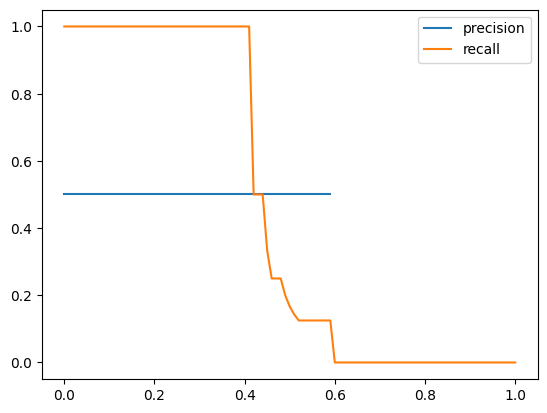

In [96]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

# plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [97]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

In [98]:
df_scores.loc[df_scores.f1.argmax()]

threshold       0.000000
tp           1729.000000
fp           1729.000000
fn              0.000000
tn              0.000000
p               0.500000
r               1.000000
f1              0.666667
Name: 0, dtype: float64

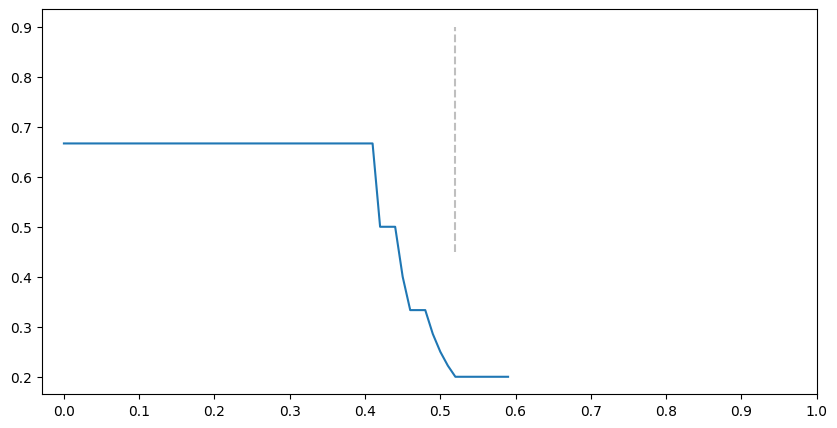

In [99]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.52, 0.45, 0.9, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()